In [1]:
from skimage import io
from PIL import Image
from matplotlib import pyplot as plt
from os import listdir
from skimage.transform import resize
import numpy as np
from IPython.display import clear_output
import os
from sklearn import preprocessing
from skimage.util import img_as_ubyte
import math
from torchvision import transforms, datasets
import torch.utils.data as data_utils
import torch
import pickle
import math 

In [2]:
t = transforms.Resize([64,64])

In [3]:
data = datasets.ImageFolder(root='small-wikiart/')
new_data = datasets.ImageFolder(root='generated_new_images/')

<Figure size 432x288 with 0 Axes>

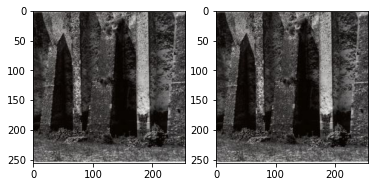

In [4]:
def plot_images(i1, i2):
    plt.figure()

    #subplot(r,c) provide the no. of rows and columns
    f, axarr = plt.subplots(1,2) 

    # use the created array to output your multiple images. In this case I have stacked 4 images vertically
    axarr[0].imshow(i1)
    axarr[1].imshow(i2)
    plt.show()
plot_images(np.array(data[0][0]),np.array(data[0][0]))

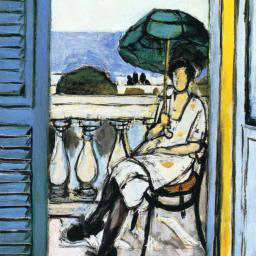

In [30]:
data[20000][0]

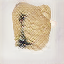

In [5]:
new_data[0][0]

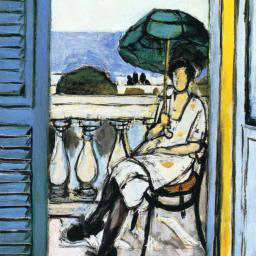

In [33]:
data[20000][0]

<Figure size 432x288 with 0 Axes>

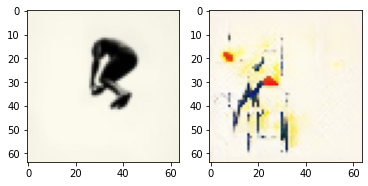

KeyboardInterrupt: 

In [29]:
min_distance = math.inf
for data_point in data:
    real_image = np.array(t(data_point[0]))
    for new_data_point in new_data:
        if data_point[1]==new_data_point[1]:
            new_image = np.array(new_data_point[0])
            distance = np.sum((real_image-new_image)**2)
            if distance<min_distance:
                closest_real = real_image
                closest_fake = new_image
                clear_output()
                plot_images(closest_real, closest_fake)
                min_distance = distance